# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [29]:
sort_corr = app_train.corr()['TARGET'].sort_values()
max_15_corr = sort_corr[-15:]
min_15_corr = sort_corr[0:15]
print('max\n', max_15_corr)
print('min\n', min_15_corr)

max
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64
min
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_

EXT_SOURCE_3
0    0.139376
1    0.000000
2    0.729567
3    0.000000
4    0.000000
Name: EXT_SOURCE_3, dtype: float64


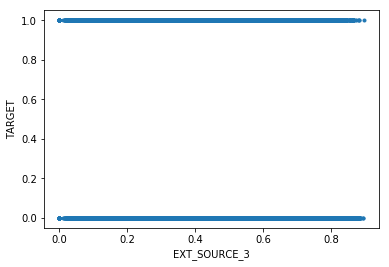

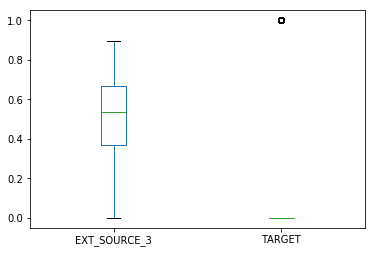

Correlation: -0.1789
EXT_SOURCE_2
0    0.262949
1    0.622246
2    0.555912
3    0.650442
4    0.322738
Name: EXT_SOURCE_2, dtype: float64


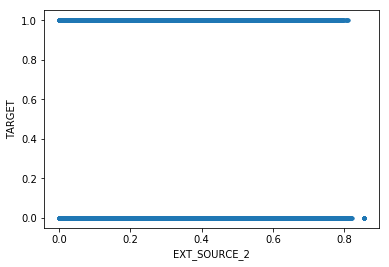

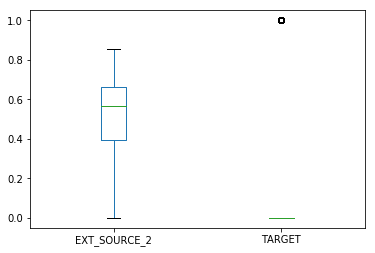

Correlation: -0.1605
EXT_SOURCE_1
0    0.083037
1    0.311267
2    0.000000
3    0.000000
4    0.000000
Name: EXT_SOURCE_1, dtype: float64


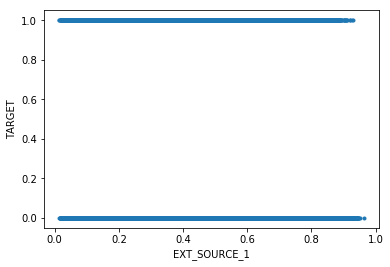

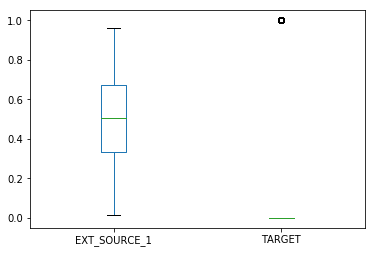

Correlation: -0.1553
DAYS_EMPLOYED
0    -637
1   -1188
2    -225
3   -3039
4   -3038
Name: DAYS_EMPLOYED, dtype: int64


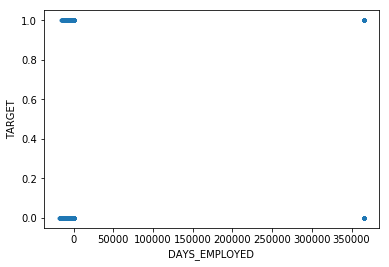

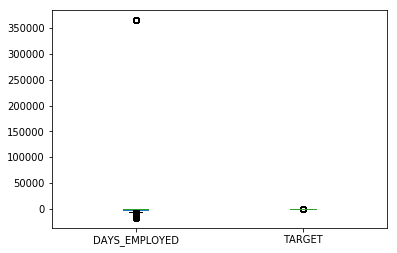

Correlation: -0.0449
FLOORSMAX_AVG
0    0.0833
1    0.2917
2    0.0000
3    0.0000
4    0.0000
Name: FLOORSMAX_AVG, dtype: float64


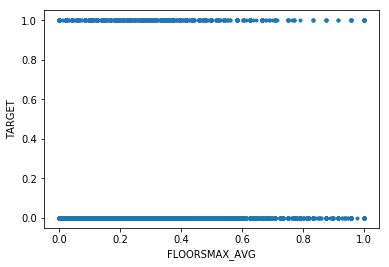

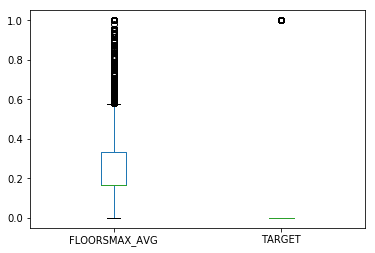

Correlation: -0.0440
FLOORSMAX_MEDI
0    0.0833
1    0.2917
2    0.0000
3    0.0000
4    0.0000
Name: FLOORSMAX_MEDI, dtype: float64


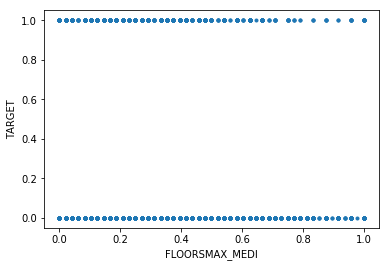

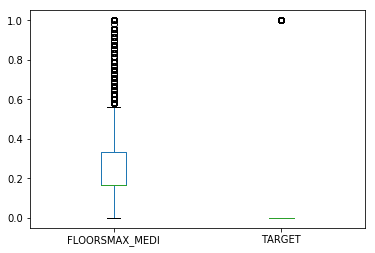

Correlation: -0.0438
FLOORSMAX_MODE
0    0.0833
1    0.2917
2    0.0000
3    0.0000
4    0.0000
Name: FLOORSMAX_MODE, dtype: float64


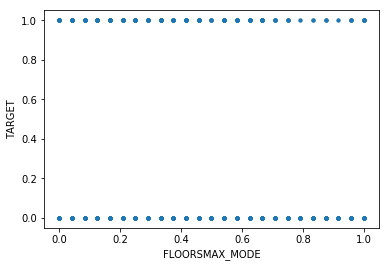

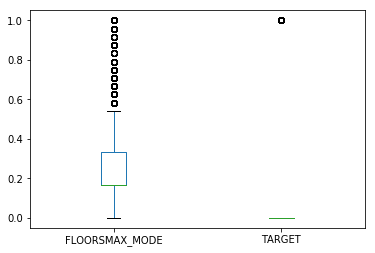

Correlation: -0.0432
AMT_GOODS_PRICE
0     351000.0
1    1129500.0
2     135000.0
3     297000.0
4     513000.0
Name: AMT_GOODS_PRICE, dtype: float64


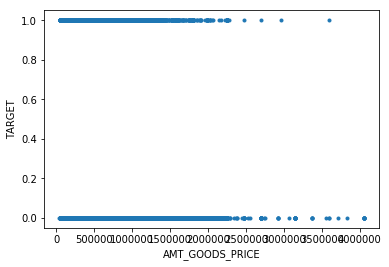

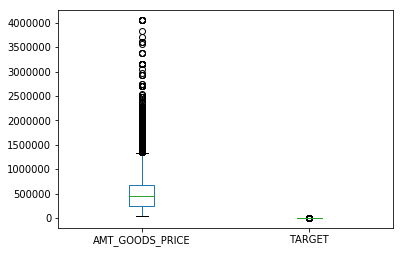

Correlation: -0.0396
REGION_POPULATION_RELATIVE
0    0.018801
1    0.003541
2    0.010032
3    0.008019
4    0.028663
Name: REGION_POPULATION_RELATIVE, dtype: float64


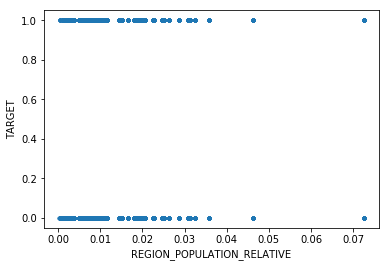

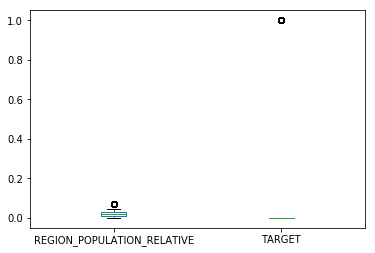

Correlation: -0.0372
ELEVATORS_AVG
0    0.00
1    0.08
2    0.00
3    0.00
4    0.00
Name: ELEVATORS_AVG, dtype: float64


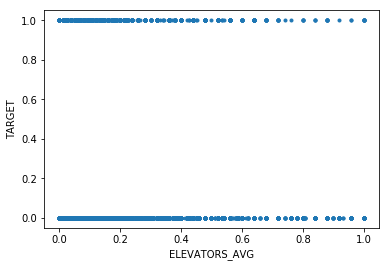

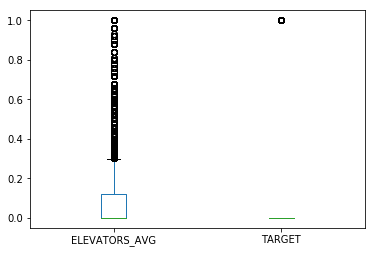

Correlation: -0.0342
ELEVATORS_MEDI
0    0.00
1    0.08
2    0.00
3    0.00
4    0.00
Name: ELEVATORS_MEDI, dtype: float64


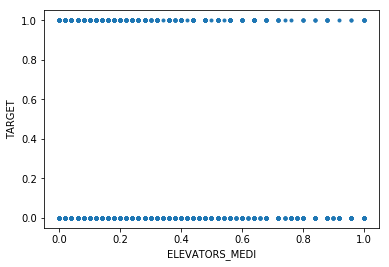

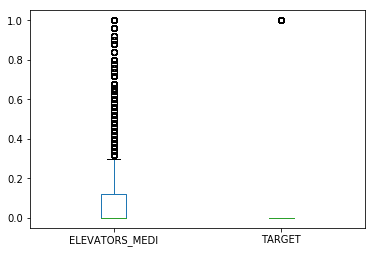

Correlation: -0.0339
FLOORSMIN_AVG
0    0.1250
1    0.3333
2    0.0000
3    0.0000
4    0.0000
Name: FLOORSMIN_AVG, dtype: float64


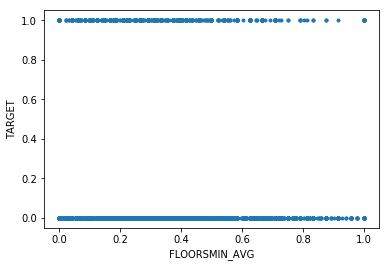

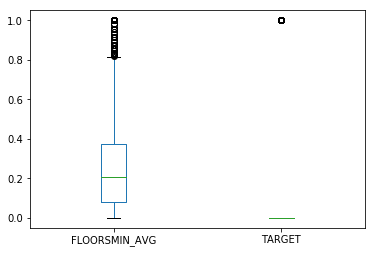

Correlation: -0.0336
FLOORSMIN_MEDI
0    0.1250
1    0.3333
2    0.0000
3    0.0000
4    0.0000
Name: FLOORSMIN_MEDI, dtype: float64


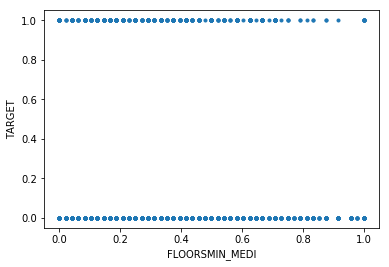

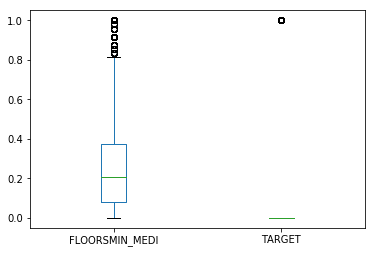

Correlation: -0.0334
LIVINGAREA_AVG
0    0.0190
1    0.0549
2    0.0000
3    0.0000
4    0.0000
Name: LIVINGAREA_AVG, dtype: float64


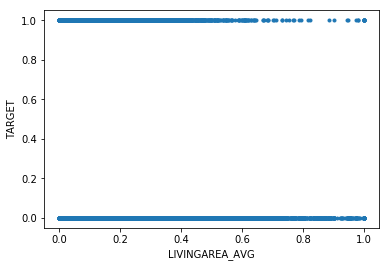

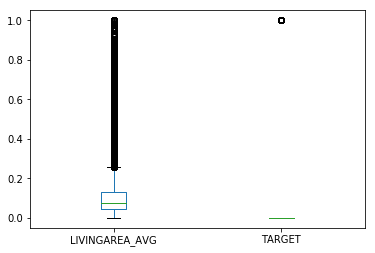

Correlation: -0.0330
LIVINGAREA_MEDI
0    0.0193
1    0.0558
2    0.0000
3    0.0000
4    0.0000
Name: LIVINGAREA_MEDI, dtype: float64


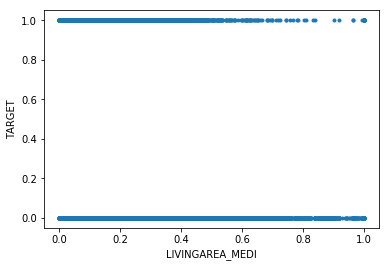

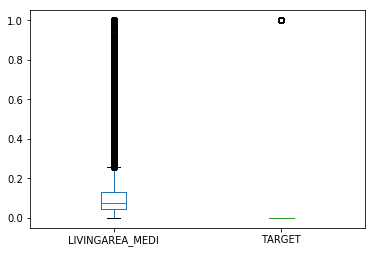

Correlation: -0.0327
DEF_60_CNT_SOCIAL_CIRCLE
0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


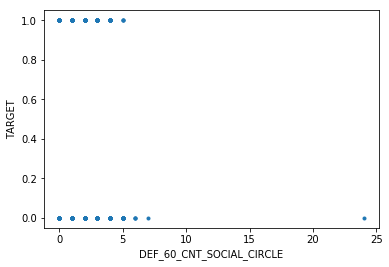

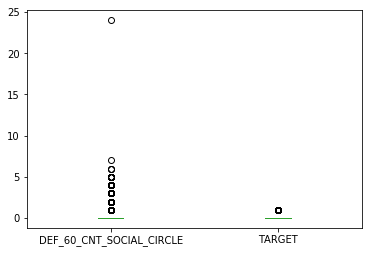

Correlation: 0.0313
DEF_30_CNT_SOCIAL_CIRCLE
0    2.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


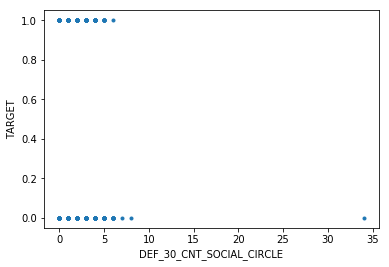

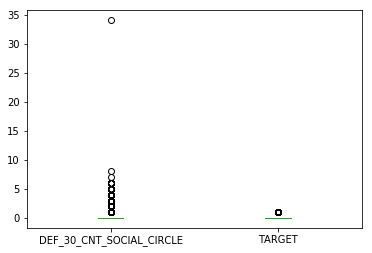

Correlation: 0.0322
LIVE_CITY_NOT_WORK_CITY
0    0
1    0
2    0
3    0
4    1
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


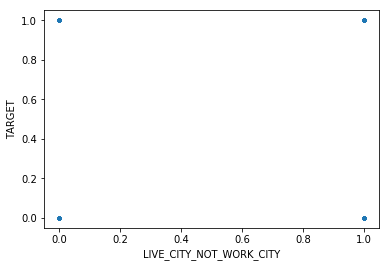

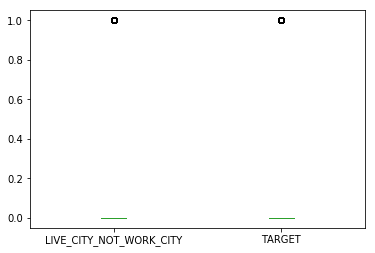

Correlation: 0.0325
OWN_CAR_AGE
0     0.0
1     0.0
2    26.0
3     0.0
4     0.0
Name: OWN_CAR_AGE, dtype: float64


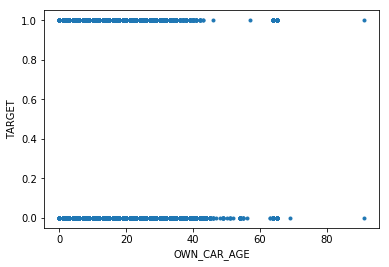

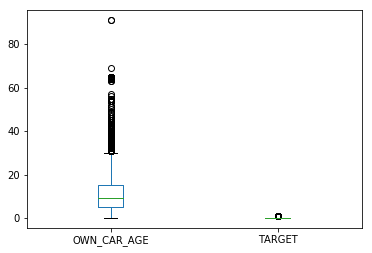

Correlation: 0.0376
DAYS_REGISTRATION
0   -3648.0
1   -1186.0
2   -4260.0
3   -9833.0
4   -4311.0
Name: DAYS_REGISTRATION, dtype: float64


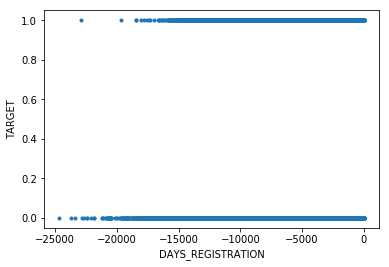

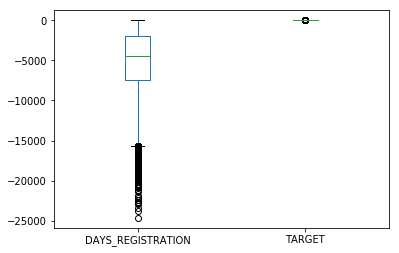

Correlation: 0.0420
FLAG_DOCUMENT_3
0    1
1    1
2    0
3    1
4    0
Name: FLAG_DOCUMENT_3, dtype: int64


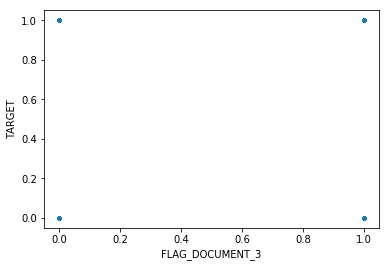

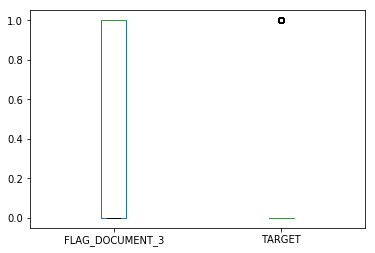

Correlation: 0.0443
REG_CITY_NOT_LIVE_CITY
0    0
1    0
2    0
3    0
4    0
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64


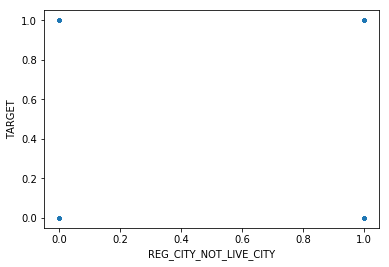

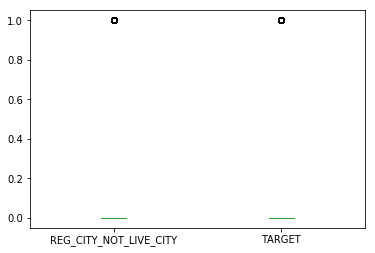

Correlation: 0.0444
FLAG_EMP_PHONE
0    1
1    1
2    1
3    1
4    1
Name: FLAG_EMP_PHONE, dtype: int64


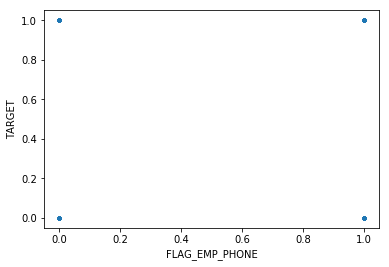

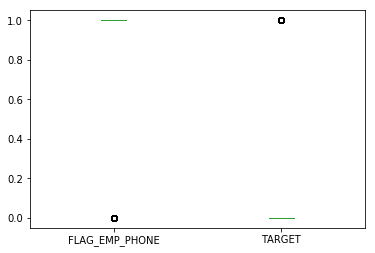

Correlation: 0.0460
REG_CITY_NOT_WORK_CITY
0    0
1    0
2    0
3    0
4    1
Name: REG_CITY_NOT_WORK_CITY, dtype: int64


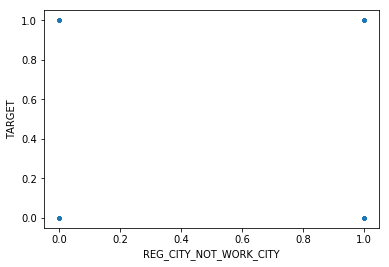

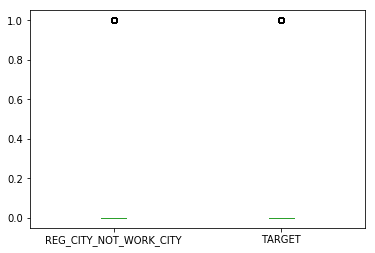

Correlation: 0.0510
DAYS_ID_PUBLISH
0   -2120
1    -291
2   -2531
3   -2437
4   -3458
Name: DAYS_ID_PUBLISH, dtype: int64


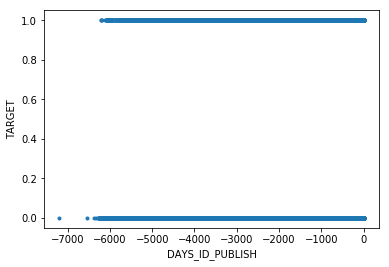

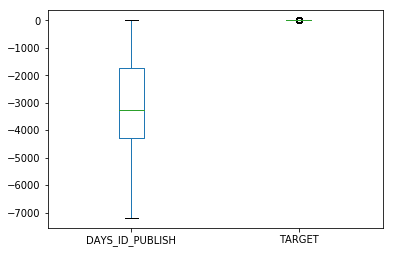

Correlation: 0.0515
DAYS_LAST_PHONE_CHANGE
0   -1134.0
1    -828.0
2    -815.0
3    -617.0
4   -1106.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


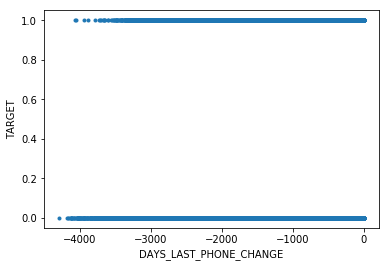

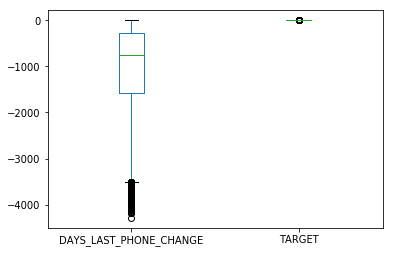

Correlation: 0.0552
REGION_RATING_CLIENT
0    2
1    1
2    2
3    2
4    2
Name: REGION_RATING_CLIENT, dtype: int64


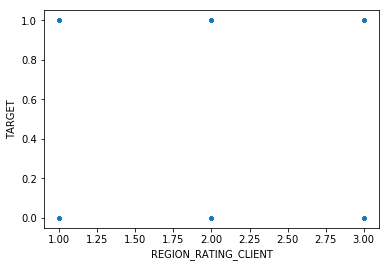

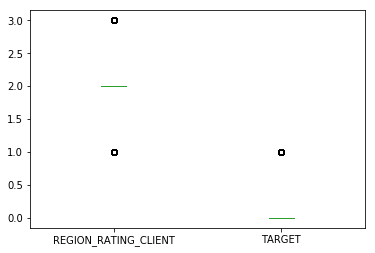

Correlation: 0.0589
REGION_RATING_CLIENT_W_CITY
0    2
1    1
2    2
3    2
4    2
Name: REGION_RATING_CLIENT_W_CITY, dtype: int64


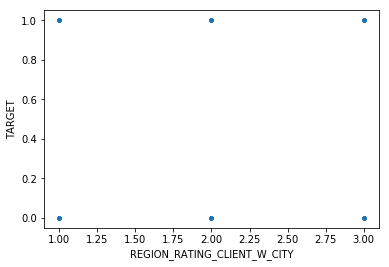

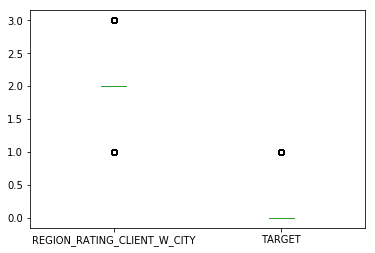

Correlation: 0.0609
DAYS_BIRTH
0    -9461
1   -16765
2   -19046
3   -19005
4   -19932
Name: DAYS_BIRTH, dtype: int64


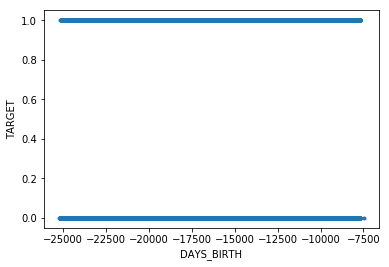

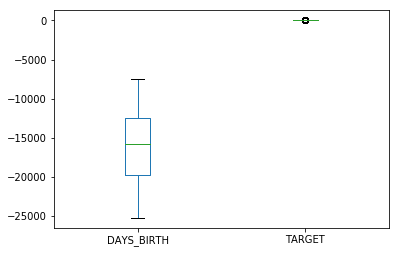

Correlation: 0.0782
TARGET
0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64


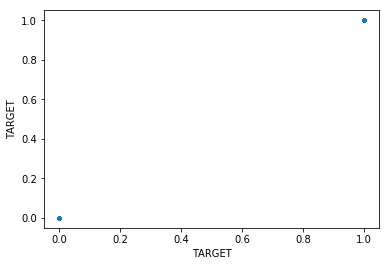

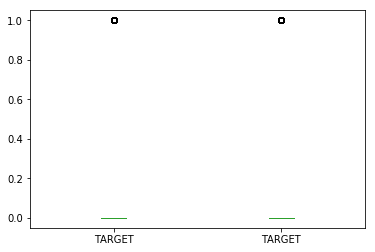

Correlation: 1.0000


In [50]:
for key, corr in zip(list(min_15_corr.index) + list(max_15_corr.index),
                     list(min_15_corr.values) + list(max_15_corr.values)):
    print(key)
    print(app_train[key].fillna(0).head())
    plt.plot(app_train[key], app_train['TARGET'], '.')
    plt.xlabel(key)
    plt.ylabel('TARGET')
    pd.DataFrame(app_train[[key, 'TARGET']], columns=[key, 'TARGET']).plot.box()
    plt.show()
#     corr = app_train[[key, 'TARGET']].corr()['TARGET'][key]
    print("Correlation: %.4f" % (corr))
    print('=' * 80)